# Unagged cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)$$

last edit Jan-2, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [3]:
subdirname = "sidisdvcs_27Oct2022_commit_2fe215f" # "sidisdvcs_v17Sep2022_commit_ea348cc"
e_e_pi,_,_ = load_SIDIS_data( Nruns = -1, 
                subdirname = subdirname,
                do_e_e_pi_n=False, do_e_e_pi_FreeP=False, fdebug=0 );

Done loading files.


## (2) Apply selection cuts not previously imposed

In [4]:
import time

In [5]:
print('number of pi+ events: %.1f'%(len(e_e_pi['piplus'])/1e6),'M')

number of pi+ events: 26.6 M


In [6]:
Nevents = -1
t0= time.time()
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(fdebug=0, 
                                                            NeventsMax=Nevents,
                                                            NMaxPerSubset=500000);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t1 - t0)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:471: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:471: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:471: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS

Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
(e,e π+ )
26562112 events after original cut (100.0 %)
18060926 events after p-theta cut (68.0 %)
17092900 events after Mx cut (64.4 %)
17053717 events after Kinematical cut (64.2 %)
(e,e π- )
11055256 events after original cut (100.0 %)
10705555 events after p-theta cut (96.8 %)
10289330 events after Mx cut (93.1 %)
10265290 events after Kinematical cut (92.9 %)
 
Done applying event-selection cuts
Time elapsed: 93.75 sec (-9.37536e+07 us/event)


## (3) Extract cross-section ratio as a function of Bjorken $x$
For a standing proton use $x_B$, defined as
$ x_B = Q^2/2m_p\omega$

In [7]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.22,0.62,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))

x bins: [0.22 0.26 0.3  0.34 0.38 0.42 0.46 0.5  0.54 0.58 0.62]
z bins: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]
0.290 < z < 0.310:
0.340 < z < 0.360:
0.390 < z < 0.410:
0.440 < z < 0.460:
0.490 < z < 0.510:
0.540 < z < 0.560:
0.590 < z < 0.610:
0.640 < z < 0.660:
0.690 < z < 0.710:
0.740 < z < 0.760:
0.790 < z < 0.810:


In [8]:
var_label = "standing proton x"
# var_label = "moving proton x"

if   var_label == "standing proton x":
    var    = 'xB'
    xlabel = "Bjorken $x$"
    
elif var_label == "moving proton x":
    var    = 'xPrime2'
    xlabel = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"    

# (4) Extract tabular data and save results to file

In [9]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           W_min    = 2.5,
                           prefix   = 'Untagged_SIDIS_ratio_',                           
                           suffix   = '')

## load results and plot them

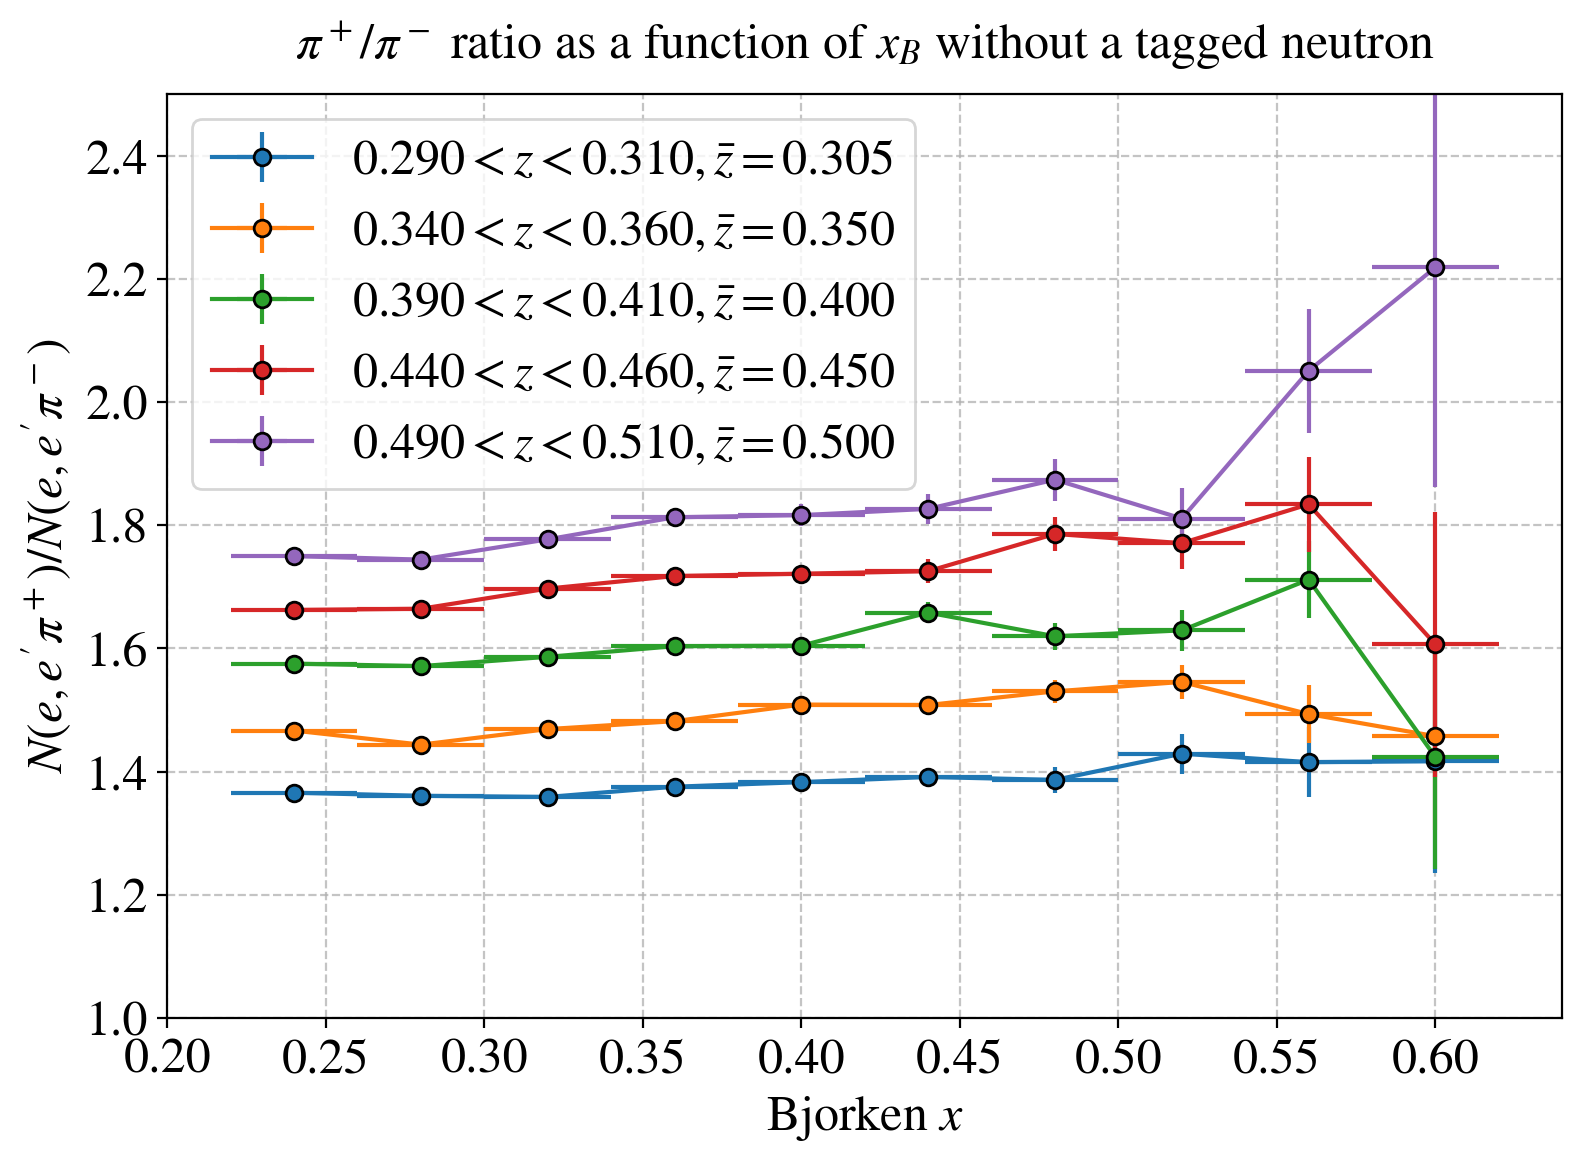

In [10]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = ''
SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True)
ax = plt.gca()
ax.set_ylim(1,2.5);

# (5) Extract modified results
E.g. in different kinematical bins 

## (5.1) Results in different bins of $M_x$

In [11]:
M_x_min_arr = [0.5,1.0,1.5,2.0,2.5]
M_x_max_arr = [1.0,1.5,2.0,2.5,3.0]

In [12]:
for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
    print(M_x_min,'<M_x<',M_x_max)
    extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/',
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = '_Mx_%.2f-%.2f_GeV'%(M_x_min,M_x_max),
                        M_x_min  = M_x_min,
                        M_x_max  = M_x_max)
    
print('done.')

0.5 <M_x< 1.0


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)


1.0 <M_x< 1.5
1.5 <M_x< 2.0
2.0 <M_x< 2.5
2.5 <M_x< 3.0
done.


### (5.1.1) bins of $M_x$ and $Q^2$

In [16]:
M_x_min_arr = [0.0,2.0]
M_x_max_arr = [2.0,4.0]
Q2_min_arr  = [2.0,4.0]
Q2_max_arr  = [4.0,9.0]


for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    print(Q2_min,'<Q2<',Q2_max)

    for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
        print('\t',M_x_min,'<M_x<',M_x_max)

        extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                            x_var    = var ,
                            x_bins   = x_bins,
                            z_bins   = z_bins,
                            z_widths = z_widths,          
                            fdebug   = 0,
                            data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Mx_and_Q2_bins/',
                            prefix   = 'Untagged_SIDIS_ratio_',                    
                            suffix   = '_Mx_%.2f-%.2f_GeV_Q2_%.2f-%.2f_GeV'%(M_x_min,M_x_max,Q2_min,Q2_max),
                            Q2_min   = Q2_min,
                            Q2_max   = Q2_max,
                            M_x_min  = M_x_min,
                            M_x_max  = M_x_max)
    
print('done.')

2.0 <Q2< 4.0
	 0.0 <M_x< 2.0
	 2.0 <M_x< 4.0
4.0 <Q2< 9.0
	 0.0 <M_x< 2.0
	 2.0 <M_x< 4.0
done.


## (5.2) Results in different bins of $Q^2$ integrated over $W$

In [24]:
#Q2_min_arr = [2.0, 2.5, 4.0, 6.0]
#Q2_max_arr = [2.5, 4.0, 6.0, 8.0]

Q2_min_arr = np.arange(2,8,0.5)
Q2_max_arr = Q2_min_arr + 0.5

z_bins   = np.arange(0.3,0.8,0.05)
z_widths = 0.01*np.ones(len(z_bins))
Q2_min_arr, Q2_max_arr

(array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5]),
 array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]))

In [25]:
x_bins

array([0.22, 0.26, 0.3 , 0.34, 0.38, 0.42, 0.46, 0.5 , 0.54, 0.58, 0.62])

In [26]:
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    suffix   = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    print(suffix)
    extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts, 
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Q2_bins/',
                        prefix   = 'Untagged_SIDIS_ratio_',                    
                        suffix   = suffix,
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max
                       )

print('done.')

_2.0_Q2_2.5
_2.5_Q2_3.0
_3.0_Q2_3.5
_3.5_Q2_4.0
_4.0_Q2_4.5
_4.5_Q2_5.0
_5.0_Q2_5.5
_5.5_Q2_6.0
_6.0_Q2_6.5
_6.5_Q2_7.0
_7.0_Q2_7.5
_7.5_Q2_8.0
done.


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)


Reading files from /Users/erezcohen/Desktop/data/BAND/Results/Q2_bins/
Untagged_SIDIS_ratio_Zpi_min0.640_Zpi_mean_pips0.650_pims0.650_Zpi_max0.660_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.540_Zpi_mean_pips0.550_pims0.550_Zpi_max0.560_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.590_Zpi_mean_pips0.600_pims0.600_Zpi_max0.610_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.690_Zpi_mean_pips0.700_pims0.700_Zpi_max0.710_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.390_Zpi_mean_pips0.400_pims0.400_Zpi_max0.410_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.440_Zpi_mean_pips0.450_pims0.450_Zpi_max0.460_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.740_Zpi_mean_pips0.750_pims0.750_Zpi_max0.760_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.490_Zpi_mean_pips0.500_pims0.500_Zpi_max0.510_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.340_Zpi_mean_pips0.350_pims0.350_Zpi_max0.360_2.0_Q2_2.5.csv
Untagged_SIDIS_ratio_Zpi_min0.290_Zpi_mean_pips0.305_pims0.305_Zpi_max0.310_2.0_Q2_2.5.csv
Done.
Reading files

ValueError: could not convert string to float: 'an'

/opt/homebrew/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


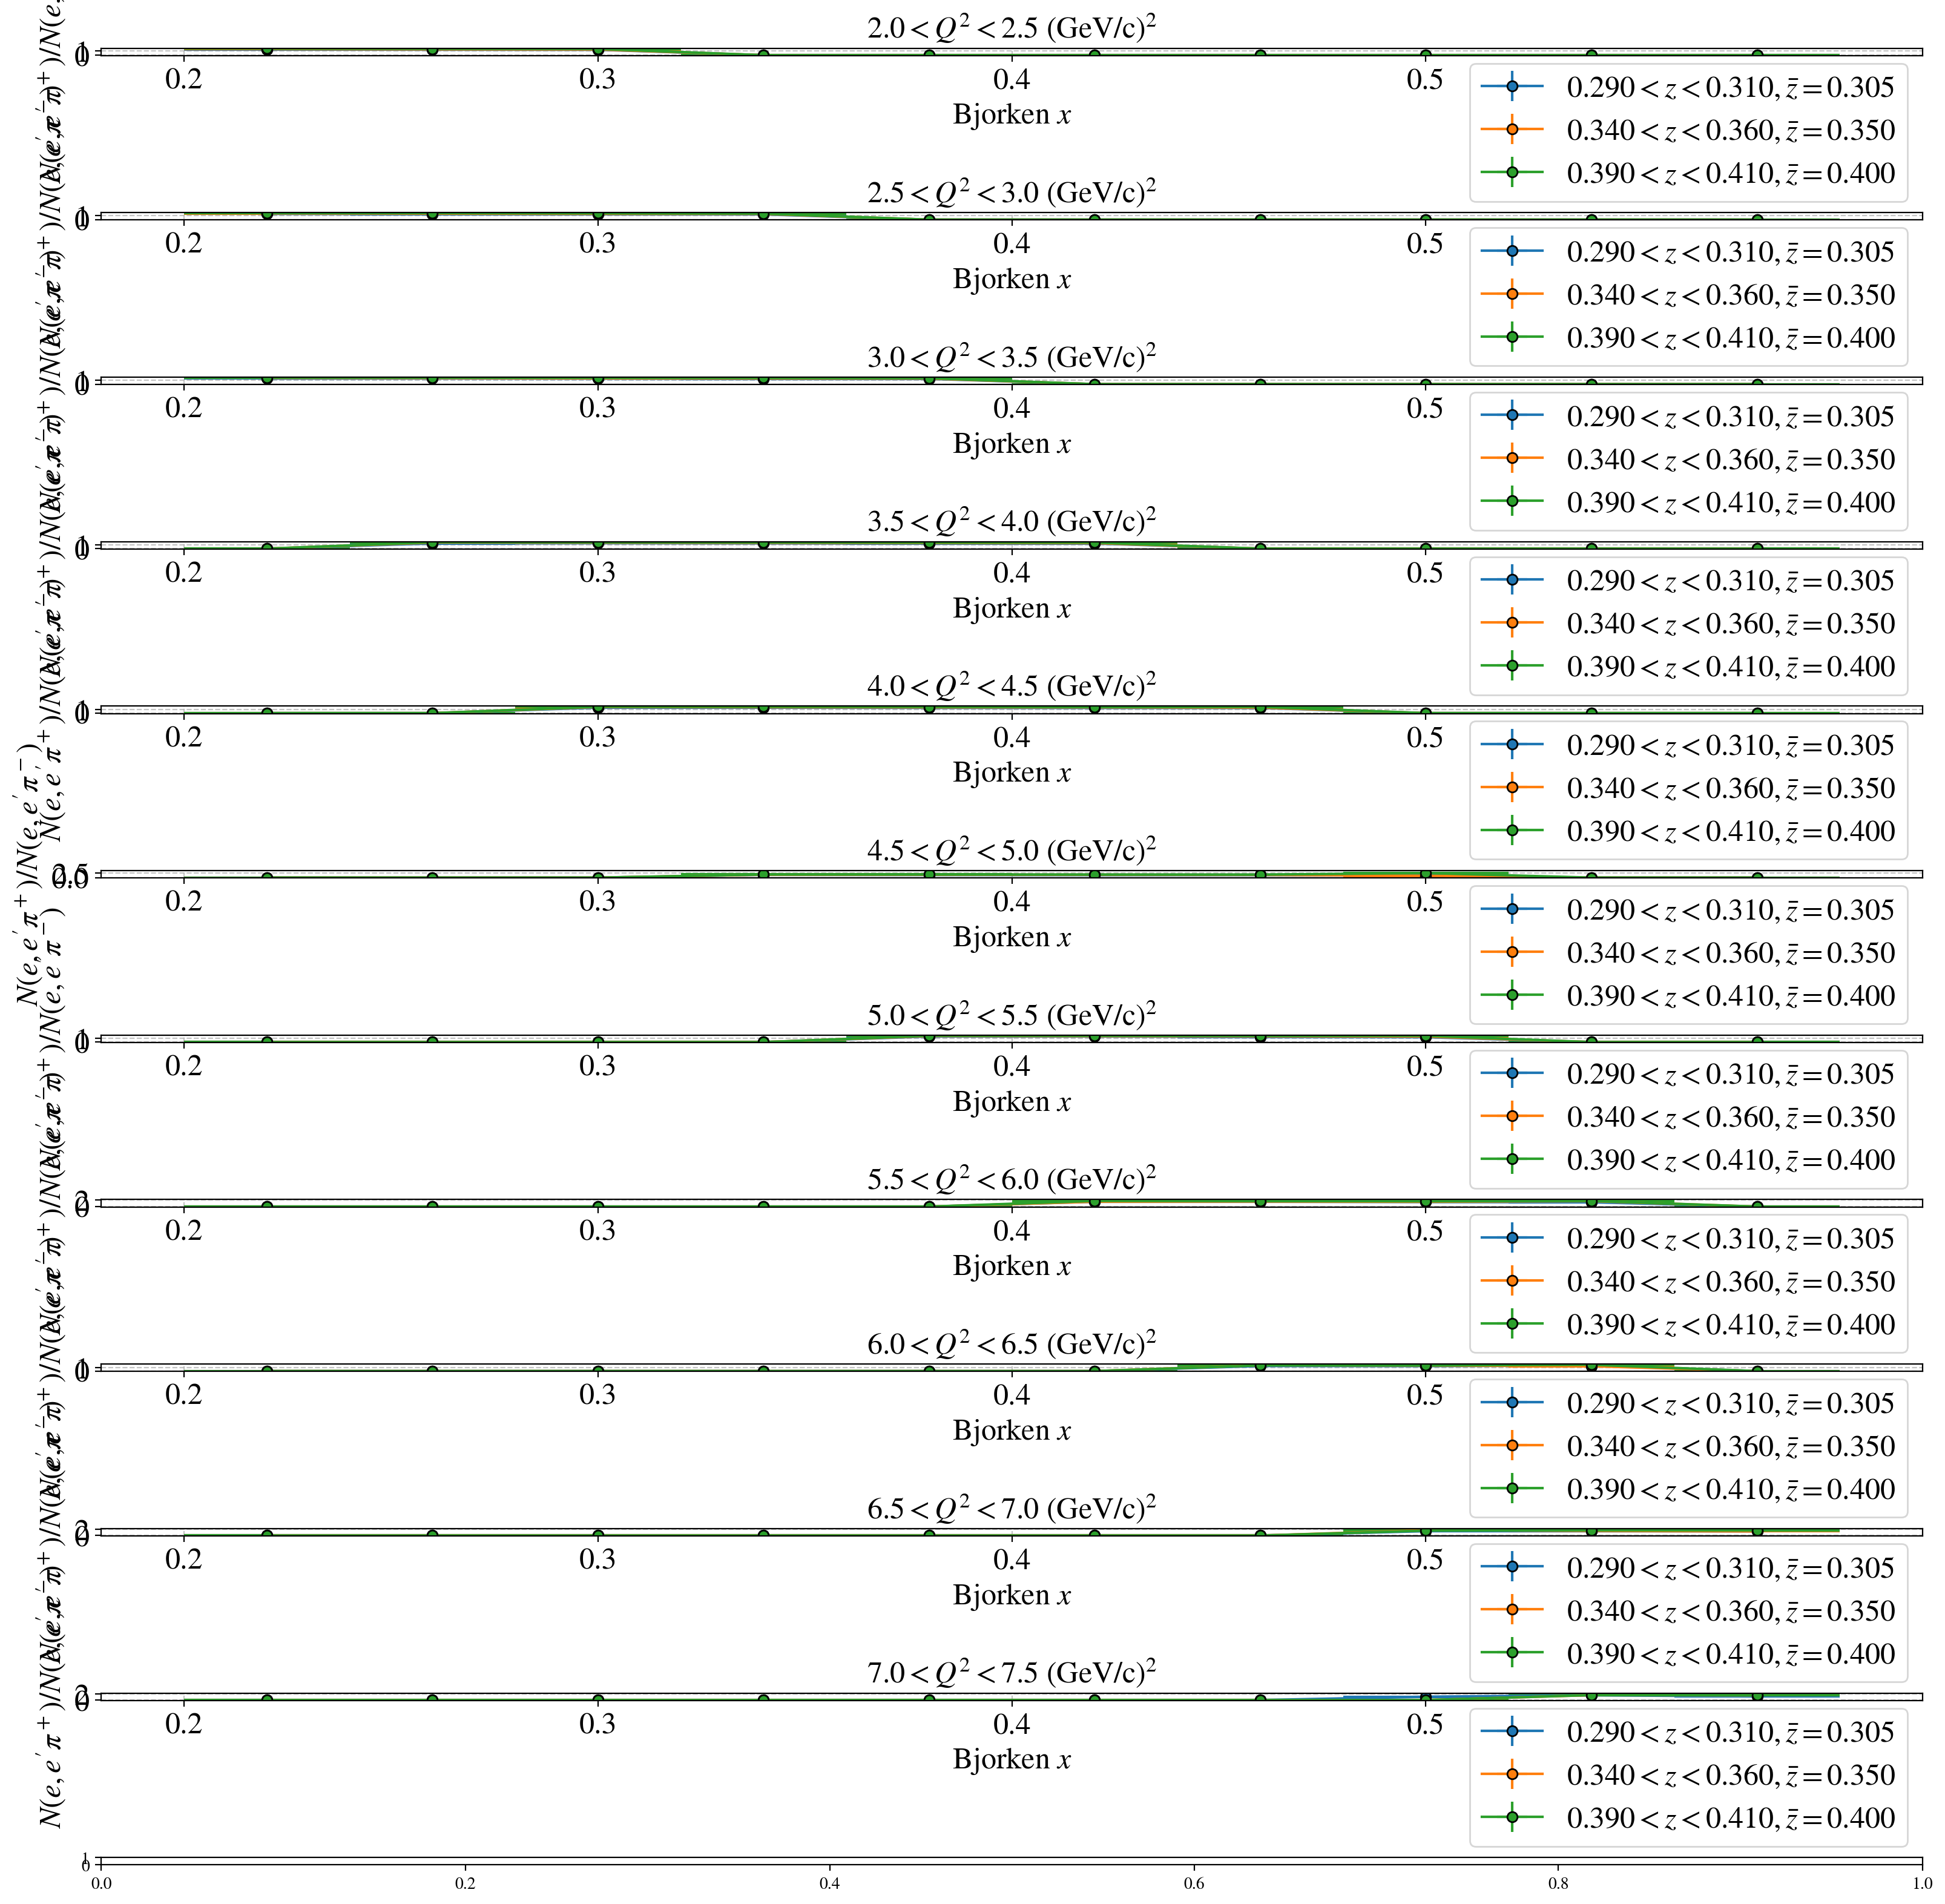

In [13]:
NQ2 = len(Q2_min_arr)
fig = plt.figure(figsize=(16,16),tight_layout=True)
for Q2_min,Q2_max,Q2_idx in zip(Q2_min_arr,Q2_max_arr, range(NQ2)):
    suffix   = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)

    axPlot = fig.add_subplot(NQ2, 1, Q2_idx + 1)
    SIDIS_results = load_SIDIS_ratio(prefix = prefix, 
                                     fdebug=3,
                                     axPlot = axPlot, 
                                     titlePlot = '$%.1f < Q^2 < %.1f$ (GeV/c)$^2$'%(Q2_min,Q2_max),
                                     data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Q2_bins/',
                                     suffix = suffix, 
                                     doPlotResults=True, 
                                     Nzbins2Plot=3)
    axPlot.set_xticks([0.2,0.3,0.4,0.5]);

## (5.3) Results in different bins of $Q^2$ and $W$

In [ ]:
from IPython.display import IFrame
IFrame('Q2.png', width=600, height=300)

In [ ]:
IFrame('W.png', width=600, height=300)

In [ ]:
Q2_min_arr = [2.0, 2.8, 3.6]
Q2_max_arr = [2.8, 3.6, 8.0]

W_min_arr = np.linspace(2.5,3.1,3)
W_max_arr = np.linspace(2.8,3.4,3)
# print(W_min_arr)  # print(W_max_arr)

z_bins   = np.arange(0.3,0.8,0.05)
z_widths = 0.01*np.ones(len(z_bins))

In [ ]:
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    for W_min,W_max in zip(W_min_arr,W_max_arr):
        suffix   = '_%.1f_Q2_%.1f____%.1f_W_%.1f'%(Q2_min,Q2_max,W_min,W_max)
        print(suffix)
        extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts, 
                            x_var    = var ,
                            x_bins   = x_bins,
                            z_bins   = z_bins,
                            z_widths = z_widths,          
                            fdebug   = 0,
                            data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Q2_and_W_bins/',
                            prefix   = 'Untagged_SIDIS_ratio_',                    
                            suffix   = suffix,
                            W_min    = W_min,
                            W_max    = W_max,
                            Q2_min   = Q2_min,
                            Q2_max   = Q2_max
                           )

print('done.')

In [ ]:
NQ2 = len(Q2_min_arr)
NW  = len(W_min_arr)
fig = plt.figure(figsize=(16,16),tight_layout=True)
for Q2_min,Q2_max,Q2_idx in zip(Q2_min_arr,Q2_max_arr, range(NQ2)):
    for W_min,W_max,W_idx in zip(W_min_arr,W_max_arr, range(NW)):
        suffix   = '_%.1f_Q2_%.1f____%.1f_W_%.1f'%(Q2_min,Q2_max,W_min,W_max)

        axPlot = fig.add_subplot(NQ2, NW, Q2_idx*NW + W_idx + 1)
        SIDIS_results = load_SIDIS_ratio(prefix = prefix, 
                                         fdebug=3,
                                         axPlot = axPlot, 
                                         titlePlot = '$%.1f < Q^2 < %.1f$ (GeV/c)$^2$, $%.1f < W < %.1f$ GeV/c$^2$'%(Q2_min,Q2_max,W_min,W_max),
                                         data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Q2_and_W_bins/',
                                         suffix = suffix, 
                                         doPlotResults=True, 
                                         Nzbins2Plot=3)
        axPlot.set_xticks([0.2,0.3,0.4,0.5]);

## (5.4) extract results for many more bins in $z$

In [ ]:
z_bins   = np.arange(0.3,0.8,0.01)
z_widths = 0.001*np.ones(len(z_bins))

prefix = 'Untagged_SIDIS_ratio_'
suffix = ''

In [ ]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Untagged_SIDIS_ratio_',                           
                           suffix   = '')

In [ ]:
SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                           prefix = prefix, suffix = suffix, 
                                           doPlotResults=True)

## (5.3) Results with no acceptance matching cut in $p-\theta$ 

In [ ]:
Nevents = -1
t0= time.time()
e_e_pi_pass_cuts_no_p_theta_cut,_,_ = apply_further_selection_cuts_to_data(fdebug=2,
                                                                           NeventsMax=Nevents, 
                                                                           doAcceptanceMatchingCut=False);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t1 - t0)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

In [ ]:
save_SIDIS_ratio_DataFrame(df_dict  = e_e_pi_pass_cuts_no_p_theta_cut,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Untagged_SIDIS_ratio_',                           
                           suffix   = '_No_AcceptanceMatchingCut')

In [ ]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
SIDIS_results = load_SIDIS_ratio_DataFrame(prefix = prefix, suffix = suffix, doPlotResults=True)

# arxiv

# Check the impact of beam charge normalization on the data

In [ ]:
e_e_pi_pass_cuts['piplus'].runnum

In [ ]:

# Rpips2pims, Rpips2pims_errup, Rpips2pims_errdw = dict(), dict(), dict()
# Y, dY = dict(),dict()
# for z_bin,z_width in zip(z_bins,z_widths):
#     z_min,z_max = z_bin-z_width,z_bin+z_width
#     (Rpips2pims[z_bin],
#      Rpips2pims_errup[z_bin], 
#      Rpips2pims_errdw[z_bin],_,_) = compute_ratio_pips_to_pims(df_dict=e_e_pi_pass_cuts  , 
#                                                              var=var, 
#                                                              bins=x_bins, 
#                                                              z_min=z_min,z_max=z_max)

#     # fit to a constant 
#     y    = Rpips2pims[z_bin]
#     y_err= (Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
#     p,cov = np.polyfit(x,y,deg=0,cov=True)
#     Y[z_bin],dY[z_bin] = p[0],cov[0,0]

#     # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
# print('done') 

In [ ]:
# fig = plt.figure(figsize=(9,6))
# ax  = fig.add_subplot(1,1,1)
# for z_bin,z_width in zip(z_bins,z_widths):
#     y    = Rpips2pims[z_bin]
#     y_err= (Rpips2pims_errup[z_bin],Rpips2pims_errdw[z_bin])
#     x_fit = np.linspace(np.min(x),np.max(x),100)
#     y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
#     y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

#     # plot
#     l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
#                 marker='o',markeredgecolor='k',
#                 label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.2f\pm%.2f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
#     ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
# set_axes(ax,xlabel,"$N(e,e'\pi^+)/N(e,e'\pi^-)$",
#          title="$\pi^+/\pi^-$ ratio as a function of $x_B$ without a tagged neutron",
#          do_add_grid=True, do_add_legend=True, fontsize=18,
#         );
# plt.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)

### Improve analysis timing with a focus on apply_further_selection_cuts_to_data()
Check timing of the function and improve it, as well as memory usage

In [ ]:
import timeit
timeit.timeit("apply_further_selection_cuts_to_data(fdebug=2, NeventsMax=-1)", 
              setup="from __main__ import apply_further_selection_cuts_to_data",number=1)

In [ ]:
e_e_pi[pi_ch].keys()
# retain only the most important features to reduce memory usage by a large pandas DataFrame
reduced_e_e_pi = dict()
for pi_ch in pi_charge_names:
    reduced_e_e_pi[pi_ch] = e_e_pi[pi_ch][['runnum','evnum',
                                           'e_P','e_Theta','e_Phi', 
                                           'pi_P', 'pi_Theta', 'pi_Phi', 
                                           'Q2', 'W', 'xB', 'Zpi',
                                           'M_X', 'e_DC_sector', 'pi_DC_sector']]
    reduced_e_e_pi[pi_ch] = reduced_e_e_pi[pi_ch].astype({"evnum": int,
                                                          "e_P":np.half,"e_Theta":np.half,"e_Phi":np.half,
                                                          "pi_P":np.half,'pi_Theta':np.half, 'pi_Phi':np.half,
                                                          'Q2':np.half, 'W':np.half, 'xB':np.half, 'Zpi':np.half,
                                                          'M_X':np.half, })

reduced_e_e_pi[pi_ch][0:5]

In [ ]:
for pi_ch in pi_charge_names:
    print(pi_ch)
    print('before cuts')
    print(e_e_pi[pi_ch].info(memory_usage="deep",verbose=False))
    print(' ')    
    # print('reduced dataframe before cuts')
    # print(reduced_e_e_pi[pi_ch].info(memory_usage="deep",verbose=False))
    # print(' ')
    print('after cuts')
    print(e_e_pi_pass_cuts[pi_ch].info(memory_usage="deep",verbose=False))
    print(' ')

In [ ]:
e_e_pi_pass_cuts[pi_ch].index